<a href="https://colab.research.google.com/github/plaban1981/Agents/blob/main/Langraph_multiagent_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -qU langchain langchain-core langchain-groq langchain-community langchain-openai langgraph-supervisor langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 894.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223

In [2]:
from google.colab import userdata
import os
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')

In [3]:
from langchain_groq import ChatGroq
groq_model=ChatGroq(model="deepseek-r1-distill-llama-70b",temperature=0.6)

### Create Pydantic Model

In [4]:
from typing import List
from pydantic import BaseModel, Field
#
class TaskEstimate(BaseModel):
  task_name:str=Field(...,description="Name ofg the Task")
  estimated_hours:float= Field(...,description="Estimated hours for the task in hours")
  required_resources:List[str]=Field(...,description="List of resources required for the completion of the task")
#

### Define  Tools

#### Task Planning

In [5]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser,StrOutputParser
#
def planningTool(project_type,project_requirements,team_mbers,objective):
  """Task Planner Function tool that helps to plan tasks"""
  prompt = """Carefully analyze the project requirements for the Project : {project_type} and break them down into individual tasks.
  Define each task's scope in detail,set achievable timelines and ensure that all the dependencies are accounted for:

  Project Objective: {objective}

  Project Requirement:
  {project_requirements}

  Team Members:
  {team_members}

  The final output should be a comprehensive list of taks with detailed scope,timelines,description,dependencies and deliverables.
  Your final OUTPUT must include a Gnatt Chart or similar timeline visualization specific to {project_type} project.
  """
  final_prompt = PromptTemplate(input_variables=["project_type","project_requirements","team_members","objective"],template=prompt)
  chain = final_prompt | groq_model | StrOutputParser()
  response = chain.invoke({"project_type":project_type,"project_requirements":project_requirements,"team_members":team_mbers,"objective":objective})
  return response

In [6]:
project_type ="website"
objective = "Create a website for a small business"
team_mbers ="""
- John Doe (Project Manager)
- Alice (Software Engineer)
- Bob Smith (FrontEnd Designer)
- Victor (QA Engineer)
- Tom Hardy (QA Engineer)
"""
project_requirements="""
- Create a responsive design that works well on desktop and mobile app
- Implement a modern visually appealing user interface with a cleann look
- Develop a user friendly navigation system with intutive menu structure
- Include an 'About Us' page highlighting the company's history and values
- Design a 'Services' page showcasing the business offerings with descriptions
- create a 'contact us' page with form and integrated map for communication
- Implement a 'blog' section for sharing industry news and company updates
- Ensure fast uploading time and optimize for Search Engines(SEO)
- Integrate Social media links and sharing capabilities
- Include testimonials section to showcase customer feedback and build trust
"""

In [ ]:
res = planningTool(project_type,project_requirements,team_mbers,objective)

In [ ]:
print(res.split("</think>")[-1])



### Project Plan for Small Business Website Development

#### **Project Overview**
The objective is to create a responsive, modern website for a small business, incorporating key features such as SEO optimization, social media integration, and a user-friendly interface. The project is divided into phases, each with specific tasks, timelines, and deliverables.

#### **Project Phases and Tasks**

1. **Planning Phase**
   - **Task 1.1: Project Plan and Requirements Gathering**
     - **Scope:** Define project scope, timeline, budget, and resources.
     - **Timeline:** Week 1
     - **Dependency:** None
     - **Deliverable:** Project plan document.

2. **Design Phase**
   - **Task 2.1: Wireframes**
     - **Scope:** Create layout for each page.
     - **Timeline:** Week 2
     - **Dependency:** Task 1.1
     - **Deliverable:** Wireframe documents.
   - **Task 2.2: Design Mockups**
     - **Scope:** Visual design incorporating brand identity.
     - **Timeline:** Week 3
     - **Depende

In [7]:
from langchain_openai import ChatOpenAI
#
openai_llm = ChatOpenAI(model="gpt-4o-mini",temperature=0)


In [8]:
from langgraph.prebuilt import create_react_agent
task_planning_agent = create_react_agent(model=groq_model,
                                         tools=[planningTool],
                                         name="Task_Planner",
                                         prompt="""You are expert Task Planner""")

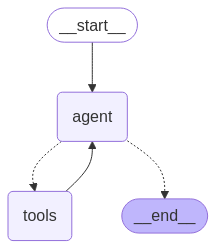

In [9]:
task_planning_agent

In [ ]:
task_planning_agent.invoke({"project_type":project_type,"project_requirements":project_requirements,"team_members":team_mbers,"objective":objective})

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_40m6', 'function': {'arguments': '{\n    "objective": "Develop a new web application",\n    "project_requirements": ["User authentication", "Data storage", "API integration"],\n    "project_type": "Software Development",\n    "team_members": ["Frontend Developer", "Backend Developer", "Designer"]\n  }', 'name': 'planningTool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 299, 'prompt_tokens': 154, 'total_tokens': 453, 'completion_time': 1.087272727, 'prompt_time': 0.013260055, 'queue_time': 1.005828519, 'total_time': 1.100532782}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_fc872c073e', 'finish_reason': 'tool_calls', 'logprobs': None}, name='Task_Planner', id='run-f9d8d5b0-6b0b-4ecc-b024-c4ace4d08f6b-0', tool_calls=[{'name': 'planningTool', 'args': {'objective': 'Develop a new web application', 'project_requirements': ['User authentication',

#### Time Estimation Agent

In [10]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser,StrOutputParser
#
def estimationTool(project_type):
  """Resource and Time Estimation Function tool that helps to estimate time,resources and effort reuired to complete a project"""
  prompt = """Thoroughly evaluate each task  in the {project_type} to estimate time,resources and effort reuired to complete the project.
  Use hiostorical data,task,complexity and available resources to provide a realistic estimate.
  The Output should be a detailed estimation report outlining the time,resources and effort required for each task in the {project_type} project.
  Take into consideration the report from the Task Planner Function tool.The report MUST include a summary of any risks or uncertainties  with the estimations encountered during the estimation process.
  """
  final_prompt = PromptTemplate(input_variables=["project_type"],template=prompt)
  chain = final_prompt | groq_model | StrOutputParser()
  response = chain.invoke({"project_type":project_type})
  return response

In [11]:
estimation_planning_agent = create_react_agent(model=groq_model,
                                         tools=[planningTool],
                                         name="Task_estimation",
                                         prompt="""You are expert Task estimator proficient in estimating time,resouce and effort required to complete a project based on the Task Planner Function tool""")

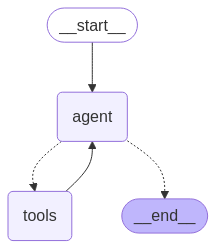

In [12]:
estimation_planning_agent

In [26]:
from langgraph_supervisor import create_supervisor
project_planning_workflow  = create_supervisor([task_planning_agent,estimation_planning_agent],
                                               model=groq_model,
                                               #output_mode="last_message",
                                               prompt=("You are a Veteran Project Manager managing Task Planning and Estimatiom"
                                               "For Task Planning use task_planner_agent and produce detailed should be a comprehensive list of taks with detailed scope,timelines,description,dependencies and deliverables."
                                               "Then use estimation_planning_agent to use the output from task_planner_agent to produce estimation fror time,resources and effort required to complete the project")
                                               )

In [27]:
app = project_planning_workflow.compile()

### Visualize Multiagent Workflow

In [46]:
from IPython.display import Image,display
print(app.get_graph().draw_mermaid())

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	supervisor(supervisor)
	Task_Planner(Task_Planner)
	Task_estimation(Task_estimation)
	__end__([<p>__end__</p>]):::last
	Task_Planner --> supervisor;
	Task_estimation --> supervisor;
	__start__ --> supervisor;
	supervisor -.-> Task_Planner;
	supervisor -.-> Task_estimation;
	supervisor -.-> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



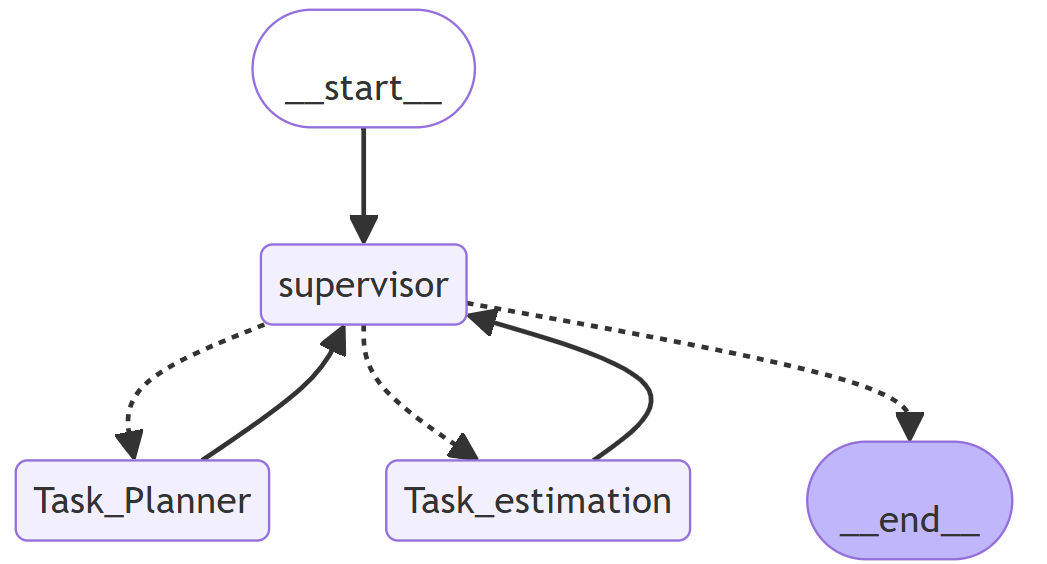

In [20]:
result = app.invoke({"project_type":project_type,"project_requirements":project_requirements,"team_members":team_mbers,"objective":objective})

In [21]:
result

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_tcw3', 'function': {'arguments': '{}', 'name': 'transfer_to_task_planner'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 734, 'prompt_tokens': 225, 'total_tokens': 959, 'completion_time': 2.736432776, 'prompt_time': 0.013657795, 'queue_time': 0.202302345, 'total_time': 2.750090571}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor', id='run-a155d1d7-4257-4451-a418-313a033e7010-0', tool_calls=[{'name': 'transfer_to_task_planner', 'args': {}, 'id': 'call_tcw3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 225, 'output_tokens': 734, 'total_tokens': 959}),
  ToolMessage(content='Successfully transferred to Task_Planner', name='transfer_to_task_planner', id='ea412ca2-d2fe-44d7-a379-e21f7def8377', tool_call_id='call_tcw3'),
  AIMessage(content='Hello! How can I ass

In [28]:
prompt = f"""Based on the information provided below

"project_type":{project_type},
"project_requirements":{project_requirements},
"team_members":{team_mbers},
"objective":{objective}

The final output should have the following:
1. The final output should be a comprehensive list of taks with detailed scope,timelines,description,dependencies and deliverables.
2. Your final OUTPUT must include a Gnatt Chart or similar timeline visualization specific to {project_type} project.
3. A detailed estimation report outlining the time,resources and effort required for each task in the {project_type} project.
4. Take into consideration the report from the Task Planner Function tool.The report MUST include a summary of any risks or uncertainties  with the estimations encountered during the estimation process.
"""

### Invoke Multiagent Workflow

In [29]:
result = app.invoke({"messages":"user","content":prompt})

In [30]:
result

{'messages': [HumanMessage(content='user', additional_kwargs={}, response_metadata={}, id='a6994720-40fd-48fb-94d1-2e6e05c4ac8b'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_d2vn', 'function': {'arguments': '{}', 'name': 'transfer_to_task_planner'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 315, 'prompt_tokens': 227, 'total_tokens': 542, 'completion_time': 1.145454545, 'prompt_time': 0.01376726, 'queue_time': 0.24120362699999998, 'total_time': 1.159221805}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor', id='run-fbc5b6f8-ccc3-433c-a244-18f2cb3a7987-0', tool_calls=[{'name': 'transfer_to_task_planner', 'args': {}, 'id': 'call_d2vn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 227, 'output_tokens': 315, 'total_tokens': 542}),
  ToolMessage(content='Successfully transferred to Task_Planner', name='transfer_to_

### Final Output from the workflow

In [39]:
print(result['messages'][-1].content)

Based on the thought process and the initial plan provided, here is a refined and organized approach to managing the task planning and estimation for developing a fitness tracking mobile app:

### 1. **Project Scope and Objectives**
   - **Primary Objective:** Develop a mobile app that allows users to track their fitness goals effectively.
   - **Key Features:**
     - User registration and profile management.
     - Setting and tracking fitness goals.
     - Activity tracking with integration capabilities for wearables and apps like Google Fit.
     - User-friendly interface with an intuitive UI/UX design.
     - Additional Considerations: Social sharing and community support features.
   - **Target Audience:** Fitness enthusiasts and general users interested in monitoring their activity levels.

### 2. **Project Phases and Timelines**
   - **Phase 1: Requirements Gathering (4 weeks)**
     - Define target audience, app features, and compatibility requirements (iOS and Android).
     

In [50]:
from IPython.display import Markdown,display
display(Markdown(result['messages'][-1].content))

Based on the thought process and the initial plan provided, here is a refined and organized approach to managing the task planning and estimation for developing a fitness tracking mobile app:

### 1. **Project Scope and Objectives**
   - **Primary Objective:** Develop a mobile app that allows users to track their fitness goals effectively.
   - **Key Features:**
     - User registration and profile management.
     - Setting and tracking fitness goals.
     - Activity tracking with integration capabilities for wearables and apps like Google Fit.
     - User-friendly interface with an intuitive UI/UX design.
     - Additional Considerations: Social sharing and community support features.
   - **Target Audience:** Fitness enthusiasts and general users interested in monitoring their activity levels.

### 2. **Project Phases and Timelines**
   - **Phase 1: Requirements Gathering (4 weeks)**
     - Define target audience, app features, and compatibility requirements (iOS and Android).
     - Ensure data security and privacy compliance.
     - Engage stakeholders to validate requirements.
   - **Phase 2: Design (6 weeks)**
     - Create wireframes and mockups for the app's UI/UX.
     - Develop a visually appealing and user-friendly design.
     - Conduct design reviews and iterate based on feedback.
   - **Phase 3: Development (16 weeks)**
     - Front-end and back-end development, including integration with third-party services.
     - Implement user authentication, data tracking, and cloud syncing.
     - Conduct unit testing and code reviews.
   - **Phase 4: Testing (6 weeks)**
     - Conduct thorough testing, including automated testing for efficiency.
     - Identify and resolve bugs promptly.
     - Perform user acceptance testing (UAT).
   - **Phase 5: Deployment (4 weeks)**
     - Prepare and publish the app on the App Store and Google Play.
     - Ensure all metadata, screenshots, and descriptions are ready.
     - Plan for a soft launch to gather initial user feedback.
   - **Buffer Time:** Allocate additional weeks for unexpected delays or issues.

### 3. **Team Roles and Responsibilities**
   - **Project Manager:** Oversee timelines, resources, and ensure project milestones are met.
   - **Developers (3):** Responsible for coding the front-end and back-end of the app, ensuring integration with third-party services.
   - **Designer (1):** Create the UI/UX design and ensure a smooth user experience.
   - **Testers (2):** Conduct testing phases, including automated and manual testing, and ensure the app is bug-free.
   - **Quality Assurance (QA) Engineer (1):** Focus on overall quality assurance and compliance.

### 4. **Tools and Communication**
   - **Project Management:** Use Jira or Trello for task tracking and project management.
   - **Version Control:** Utilize Git with repositories on GitHub or Bitbucket.
   - **Communication:** Implement Slack or Microsoft Teams for regular updates and team communication.
   - **Training:** Ensure all team members are comfortable with the chosen tools.

### 5. **Risk Management**
   - **Team Member Departure:** Ensure cross-training and knowledge sharing among team members.
   - **Scope Creep:** Manage stakeholder expectations and adhere to the initial scope unless necessary changes arise.
   - **Quality Assurance:** Integrate testing early in the development phase and use automated testing tools.
   - **Technical Debt:** Regularly review and address technical debt to maintain code quality.
   - **Integration Challenges:** Plan for contingencies and have backup solutions for third-party integrations.

### 6. **Post-Deployment Strategy**
   - **Support and Updates:** Plan for ongoing support to address any post-launch issues.
   - **User Feedback:** Incorporate a feedback mechanism within the app for continuous improvement.
   - **Marketing and User Acquisition:** Consider future phases for marketing strategies.

### 7. **Final Steps**
   - **Deployment:** Publish the app on both platforms with all necessary metadata.
   - **Soft Launch:** Coordinate a soft launch to gather initial user feedback before the full launch.
   - **Review and Adjust:** Based on feedback, make necessary adjustments and plan for future updates.

By following this refined plan, we aim to deliver a high-quality fitness tracking app that meets user needs and expectations, while also being prepared for potential challenges and ensuring long-term success.